Question 1: Implementing Linear Regression <br>

Description:<br>
Implement a simple linear regression model using Python and scikit-learn to predict house prices based on one feature: the size of the house.

Mean Squared Error: 33.20
R-squared: 1.00


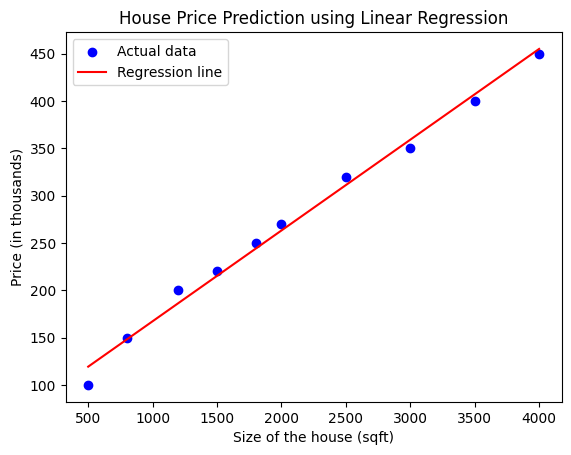

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

def load_data():
    # Synthetic example data
    X = np.array([[500], [800], [1200], [1500], [1800], [2000], [2500], [3000], [3500], [4000]])
    y = np.array([100, 150, 200, 220, 250, 270, 320, 350, 400, 450])
    return X, y

def preprocess_data(X, normalize=False):
    if normalize:
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)
        return X_scaled, scaler
    return X, None

def train_and_evaluate(X, y):
    try:
        if X.size == 0 or y.size == 0:
            raise ValueError("Input data cannot be empty.")

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
        model = LinearRegression()
        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        print(f'Mean Squared Error: {mse:.2f}')
        print(f'R-squared: {r2:.2f}')

        return model
    except Exception as e:
        print(f"Error during training or evaluation: {e}")
        return None

def plot_regression(X, y, model, scaler=None):
    try:
        X_plot = scaler.inverse_transform(X) if scaler else X
        y_pred_full = model.predict(X)

        plt.scatter(X_plot, y, color='blue', label='Actual data')
        plt.plot(X_plot, y_pred_full, color='red', label='Regression line')
        plt.xlabel('Size of the house (sqft)')
        plt.ylabel('Price (in thousands)')
        plt.title('House Price Prediction using Linear Regression')
        plt.legend()
        plt.show()
    except Exception as e:
        print(f"Error during plotting: {e}")

# === Driver Code ===
X_raw, y = load_data()
X, scaler = preprocess_data(X_raw, normalize=True)
model = train_and_evaluate(X, y)
if model:
    plot_regression(X, y, model, scaler)
